In [1]:
import pandas as pd

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [2]:
df = pd.read_csv('TS_data.txt', sep=",", header=0)
df['DATE'] = pd.to_datetime(df['DATE'].astype(str))
df['TG'] = df['TG']*0.1
df.head()

,SOUID,DATE,TG,Q_TG
0,128124,1947-01-01,-2.4,0
1,128124,1947-01-02,-3.5,0
2,128124,1947-01-03,-4.5,0
3,128124,1947-01-04,-12.7,0
4,128124,1947-01-05,-15.0,0


In [3]:
df_copy = df[df['DATE'] >= 'January 1955'].copy()
df_copy.head()

,SOUID,DATE,TG,Q_TG
2922,128124,1955-01-01,-1.9,0
2923,128124,1955-01-02,-2.0,0
2924,128124,1955-01-03,-2.6,0
2925,128124,1955-01-04,-3.9,0
2926,128124,1955-01-05,-7.1,0


In [4]:
fb_df = df_copy[['DATE', 'TG']]
fb_df = fb_df.rename(columns={"DATE": "ds", "TG": "y"})
fb_df.head()

,ds,y
2922,1955-01-01,-1.9
2923,1955-01-02,-2.0
2924,1955-01-03,-2.6
2925,1955-01-04,-3.9
2926,1955-01-05,-7.1


In [5]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(fb_df)
future = m.make_future_dataframe(periods=365)
# future.tail()
forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

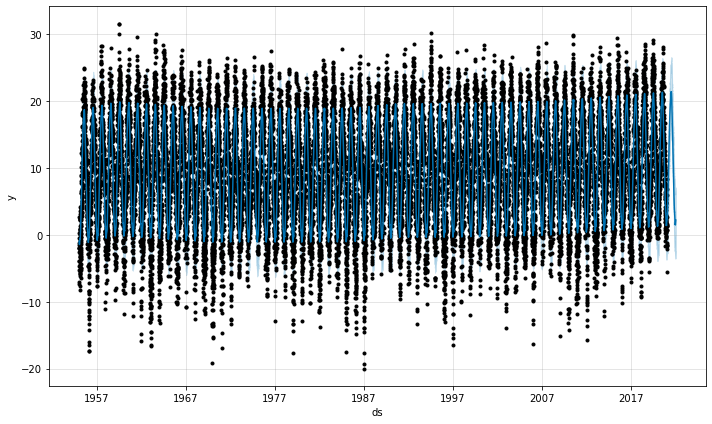

In [6]:
f1 = m.plot(forecast)

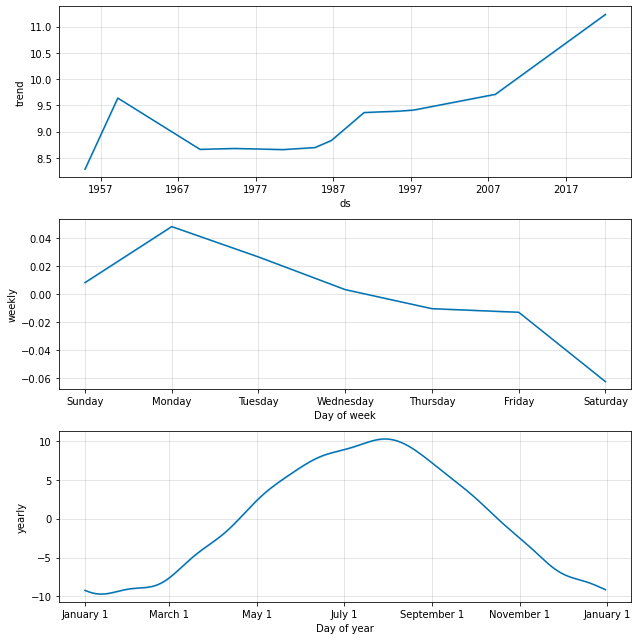

In [7]:
f2 = m.plot_components(forecast)

In [8]:
fig_plt_for = plot_plotly(m, forecast)
fig_plt_for.write_html('fig_plt_for.html')
fig_plt_com = plot_components_plotly(m, forecast)
fig_plt_com.write_html('fig_plt_com.html')